# Assessing the Resilience of London's Underground: Exploring Topological Networks, Weighted Networks, and Spatial Interaction Models

## 1 London’s underground resilience

### 1.1 Topological network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import numpy as np
import os
from networkx import algorithms 
from networkx.algorithms import efficiency
from networkx.algorithms import components
from networkx.algorithms.efficiency_measures import global_efficiency
from networkx.algorithms.components import connected_components
import warnings
warnings.filterwarnings("ignore", message="info is deprecated")

In [2]:
G = nx.read_graphml('data/london.graph')

In [3]:
print(G.is_directed()) 

False


In [4]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [5]:
G_nodes = list(G.nodes)
print(G_nodes[:10])

['West Acton', 'Ealing Broadway', 'North Acton', 'West Ruislip', 'Ruislip Gardens', 'South Ruislip', 'Northolt', 'Greenford', 'Perivale', 'Hanger Lane']


In [6]:
# iterate over each node and evaluate 'coords' attribute using eval
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# print the 'coords' attribute of each node
for node in G.nodes():
    print(f"Node {node}: {G.nodes[node]['coords']}")

Node West Acton: (519396.4966177136, 181320.53600355436)
Node Ealing Broadway: (517952.06193833845, 180930.32080099251)
Node North Acton: (520831.6447646859, 181956.23485728912)
Node West Ruislip: (508377.63766211295, 186796.26829912647)
Node Ruislip Gardens: (510274.96303267614, 185847.93603156926)
Node South Ruislip: (511067.68775256537, 185452.8677318886)
Node Northolt: (513183.84620711236, 184537.88584416185)
Node Greenford: (514881.14881801384, 183885.81765838724)
Node Perivale: (516367.65635744407, 183313.49461914203)
Node Hanger Lane: (518485.2444701355, 182645.67699126614)
Node East Acton: (521691.8527282366, 181227.30740708666)
Node White City: (523313.5094514196, 180732.60128608742)
Node Shepherd's Bush: (523793.6784481174, 179934.01228072753)
Node Holland Park: (524627.1875986009, 180231.0631897372)
Node Notting Hill Gate: (525284.4693677047, 180461.21547897242)
Node Queensway: (525896.0483197575, 180621.0494660876)
Node Lancaster Gate: (526730.8301189523, 180794.3392868059)

In [7]:


# Print basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes(data=True))[:5])  # Display the first 5 nodes with their attributes
print("Edges:", list(G.edges(data=True))[:5])  # Display the first 5 edges with their attributes


Number of nodes: 401
Number of edges: 467
Nodes: [('West Acton', {'coords': (519396.4966177136, 181320.53600355436)}), ('Ealing Broadway', {'coords': (517952.06193833845, 180930.32080099251)}), ('North Acton', {'coords': (520831.6447646859, 181956.23485728912)}), ('West Ruislip', {'coords': (508377.63766211295, 186796.26829912647)}), ('Ruislip Gardens', {'coords': (510274.96303267614, 185847.93603156926)})]
Edges: [('West Acton', 'Ealing Broadway', {'length': 1616.9021668205828, 'line_name': 'Central', 'flows': 8715}), ('West Acton', 'North Acton', {'length': 1811.4947747425283, 'line_name': 'Central', 'flows': 9761}), ('Ealing Broadway', 'Ealing Common', {'length': 1565.2970829542974, 'line_name': 'District', 'flows': 10022}), ('North Acton', 'Hanger Lane', {'length': 2454.2933486674083, 'line_name': 'Central', 'flows': 14837}), ('North Acton', 'East Acton', {'length': 1180.5193163423091, 'line_name': 'Central', 'flows': 26802})]


In [8]:
data = nx.to_pandas_edgelist(G)
data.head()

,source,target,length,flows,line_name
0,West Acton,Ealing Broadway,1616.902167,8715,Central
1,West Acton,North Acton,1811.494775,9761,Central
2,Ealing Broadway,Ealing Common,1565.297083,10022,District
3,North Acton,Hanger Lane,2454.293349,14837,Central
4,North Acton,East Acton,1180.519316,26802,Central


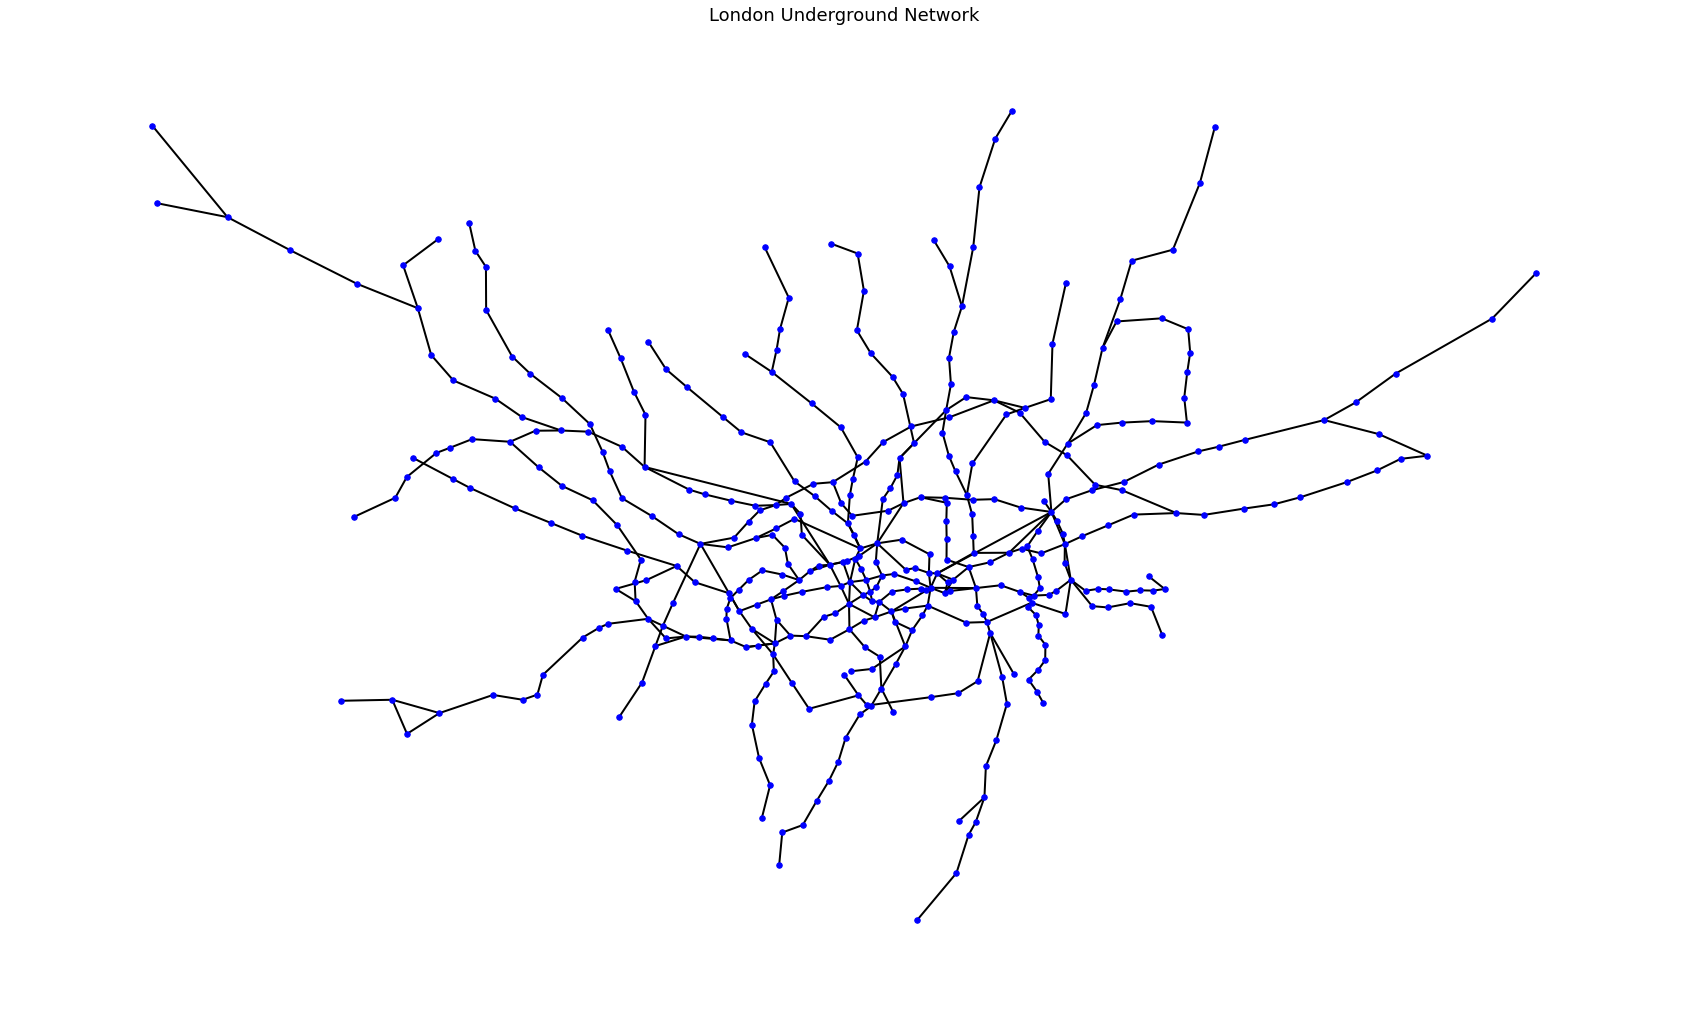

In [9]:
# plot the network
fig, ax = plt.subplots(figsize=(30, 18))

node_labels = nx.get_node_attributes(G, 'station_name')
pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G, pos, node_size=30, node_color='blue')
nx.draw_networkx_edges(G, pos, width=2, edge_color='black')
nx.draw_networkx_labels(G, pos, node_labels, font_size=12, font_color='red')

plt.title('London Underground Network', fontsize=18)
plt.axis('off')
plt.show()

In [10]:
# compute degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodes by degree centrality:")
for d in sorted_degree[:10]:
    print(d)

Top 10 nodes by degree centrality:
('Stratford', 0.0225)
('Bank and Monument', 0.02)
('Baker Street', 0.0175)
("King's Cross St. Pancras", 0.0175)
('Oxford Circus', 0.015)
('Liverpool Street', 0.015)
('West Ham', 0.015)
('Canning Town', 0.015)
('Waterloo', 0.015)
('Green Park', 0.015)


In [11]:
# compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)

Top 10 nodes by betweenness centrality:
('Stratford', 0.2978457823852561)
('Bank and Monument', 0.29048946048382146)
('Liverpool Street', 0.27080685525140363)
("King's Cross St. Pancras", 0.2553072865243917)
('Waterloo', 0.24392083111819968)
('Green Park', 0.21583486358392368)
('Euston', 0.20832425399718657)
('Westminster', 0.20333528717175292)
('Baker Street', 0.19156776455930594)
('Finchley Road', 0.1650846868252883)


In [12]:
# compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodes by closeness centrality:")
for c in sorted_closeness[:10]:
    print(c)

Top 10 nodes by closeness centrality:
('Green Park', 0.11477761836441894)
('Bank and Monument', 0.1135718341851221)
("King's Cross St. Pancras", 0.11344299489506524)
('Westminster', 0.11254924029262803)
('Waterloo', 0.11226494527083918)
('Oxford Circus', 0.11120378092855157)
('Bond Street', 0.11098779134295228)
('Angel', 0.11074197120708748)
('Farringdon', 0.11074197120708748)
('Moorgate', 0.11031439602868175)


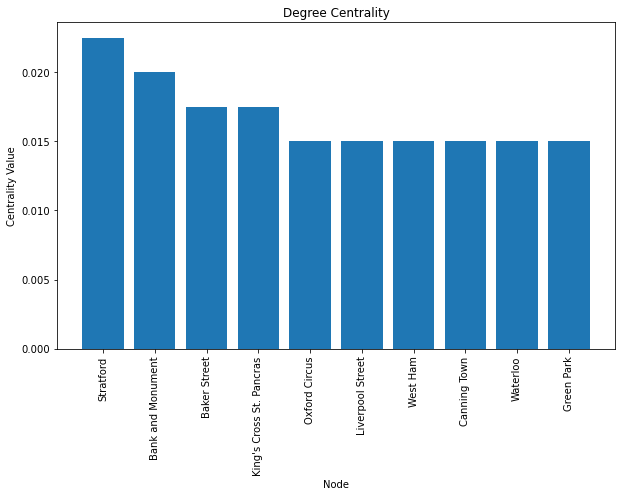

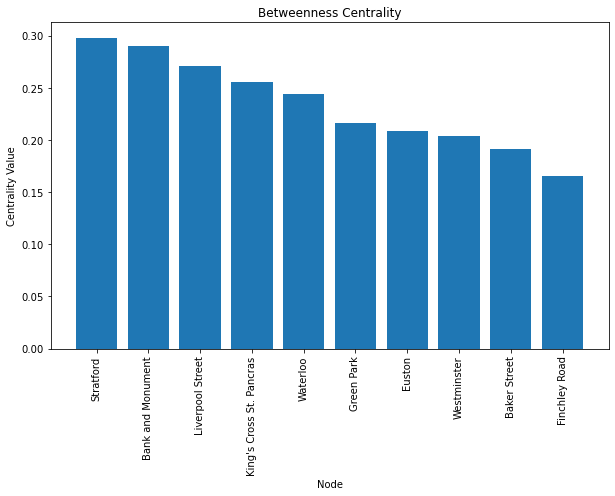

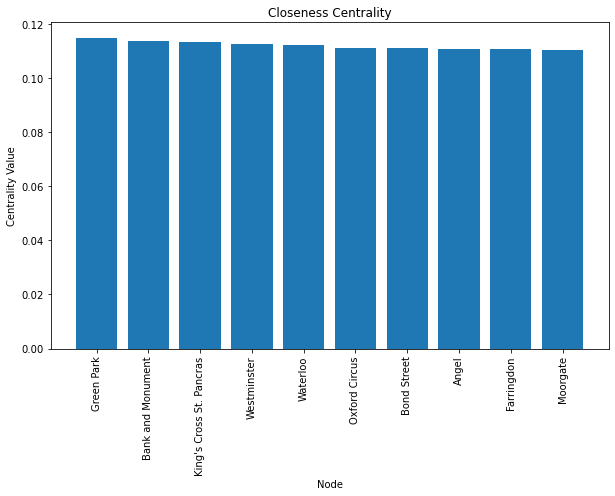

In [13]:
# compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# sort nodes by degree centrality and get top 10
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
degree_labels = [node[0] for node in sorted_degree]
degree_values = [node[1] for node in sorted_degree]

# sort nodes by betweenness centrality and get top 10
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
betweenness_labels = [node[0] for node in sorted_betweenness]
betweenness_values = [node[1] for node in sorted_betweenness]

# sort nodes by closeness centrality and get top 10
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
closeness_labels = [node[0] for node in sorted_closeness]
closeness_values = [node[1] for node in sorted_closeness]

# plot degree centrality bar graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(degree_labels, degree_values)
ax.set_title("Degree Centrality")
ax.set_xlabel("Node")
ax.set_ylabel("Centrality Value")
plt.xticks(rotation=90)
plt.show()

# plot betweenness centrality bar graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(betweenness_labels, betweenness_values)
ax.set_title("Betweenness Centrality")
ax.set_xlabel("Node")
ax.set_ylabel("Centrality Value")
plt.xticks(rotation=90)
plt.show()

# plot closeness centrality bar graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(closeness_labels, closeness_values)
ax.set_title("Closeness Centrality")
ax.set_xlabel("Node")
ax.set_ylabel("Centrality Value")
plt.xticks(rotation=90)
plt.show()

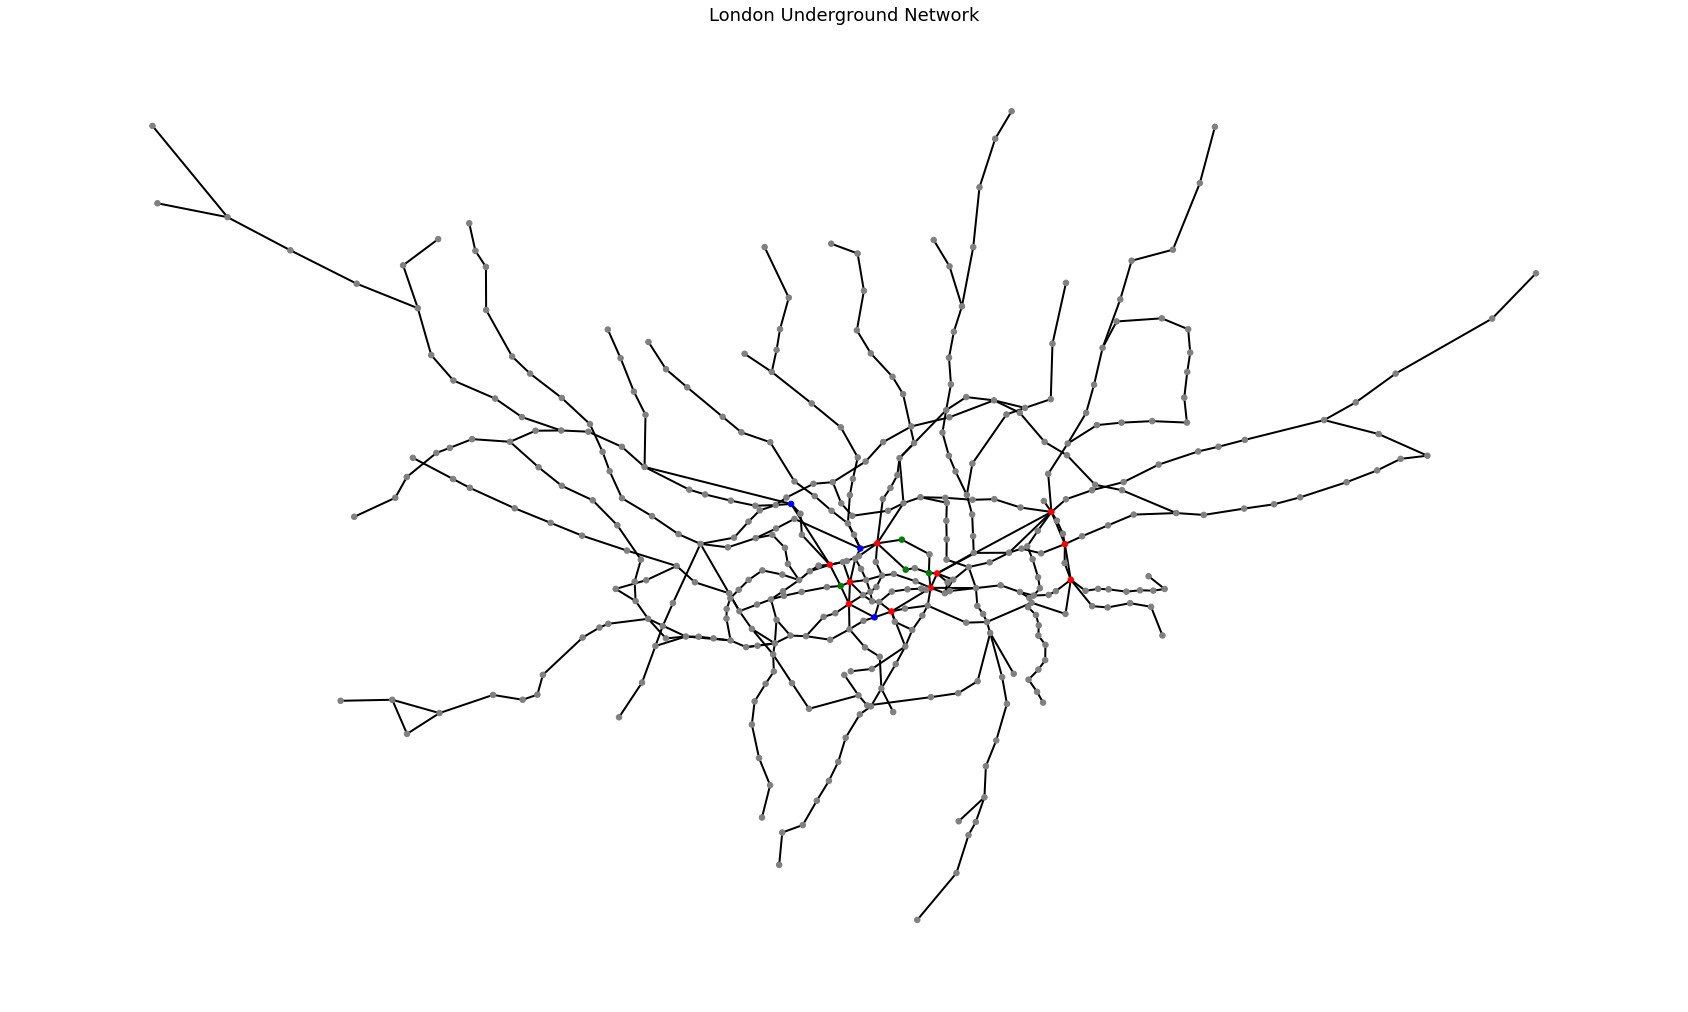

In [17]:
# plot the network
fig, ax = plt.subplots(figsize=(30, 18))

node_labels = nx.get_node_attributes(G, 'station_name')
pos = nx.get_node_attributes(G, 'coords')

# Function to get node colors based on centrality
def get_node_colors(G, degree_nodes, betweenness_nodes, closeness_nodes):
    node_colors = []
    
    for node in G.nodes():
        if node in degree_nodes:
            node_colors.append('red')  # Degree centrality nodes in red
        elif node in betweenness_nodes:
            node_colors.append('blue')  # Betweenness centrality nodes in blue
        elif node in closeness_nodes:
            node_colors.append('green')  # Closeness centrality nodes in green
        else:
            node_colors.append('gray')  # Other nodes in gray
            
    return node_colors

# Get node colors based on centrality
node_colors = get_node_colors(G, top_degree_nodes, top_betweenness_nodes, top_closeness_nodes)

nx.draw_networkx_nodes(G, pos, node_size=30, node_color=node_colors)
nx.draw_networkx_edges(G, pos, width=2, edge_color='black')
nx.draw_networkx_labels(G, pos, node_labels, font_size=12, font_color='red')

plt.title('London Underground Network', fontsize=18)
plt.axis('off')
plt.show()





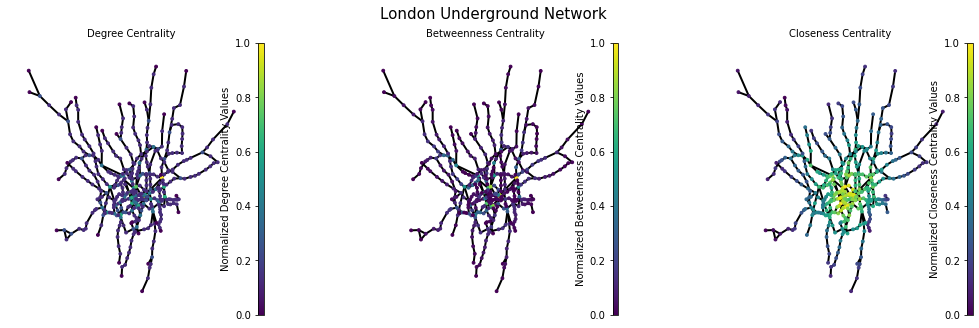

In [46]:
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

node_labels = nx.get_node_attributes(G, 'station_name')
pos = nx.get_node_attributes(G, 'coords')

# Normalize centrality values
normalized_degree = normalize_centrality(degree_centrality)
normalized_betweenness = normalize_centrality(betweenness_centrality)
normalized_closeness = normalize_centrality(closeness_centrality)

# Get node colors based on centrality values
degree_color_dict = get_colored_centrality_values(normalized_degree)
betweenness_color_dict = get_colored_centrality_values(normalized_betweenness)
closeness_color_dict = get_colored_centrality_values(normalized_closeness)

node_colors_degree = [degree_color_dict[node] for node in G.nodes()]
node_colors_betweenness = [betweenness_color_dict[node] for node in G.nodes()]
node_colors_closeness = [closeness_color_dict[node] for node in G.nodes()]

# Degree Centrality Plot
nx.draw_networkx_nodes(G, pos, node_size=8, node_color=node_colors_degree, ax=ax1)
nx.draw_networkx_edges(G, pos, width=2, edge_color='black', ax=ax1)
ax1.set_title('Degree Centrality', fontsize=10)
ax1.axis('off')

# Betweenness Centrality Plot
nx.draw_networkx_nodes(G, pos, node_size=8, node_color=node_colors_betweenness, ax=ax2)
nx.draw_networkx_edges(G, pos, width=2, edge_color='black', ax=ax2)
ax2.set_title('Betweenness Centrality', fontsize=10)
ax2.axis('off')

# Closeness Centrality Plot
nx.draw_networkx_nodes(G, pos, node_size=8, node_color=node_colors_closeness, ax=ax3)
nx.draw_networkx_edges(G, pos, width=2, edge_color='black', ax=ax3)
ax3.set_title('Closeness Centrality', fontsize=10)
ax3.axis('off')

# Add colorbars for each subplot
for i, (ax, centrality_values) in enumerate([(ax1, normalized_degree.values()), 
                                             (ax2, normalized_betweenness.values()), 
                                             (ax3, normalized_closeness.values())]):
    sm = cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, pad=0.01, aspect=50)
    cbar.set_label(f'Normalized {ax.get_title()} Values', fontsize=10)
    cbar.ax.yaxis.set_label_position("left")
    cbar.ax.yaxis.set_ticks_position("left")
    

plt.suptitle('London Underground Network', fontsize=15)
plt.savefig('london_underground_centrality.png', dpi=300, bbox_inches='tight')
plt.show()


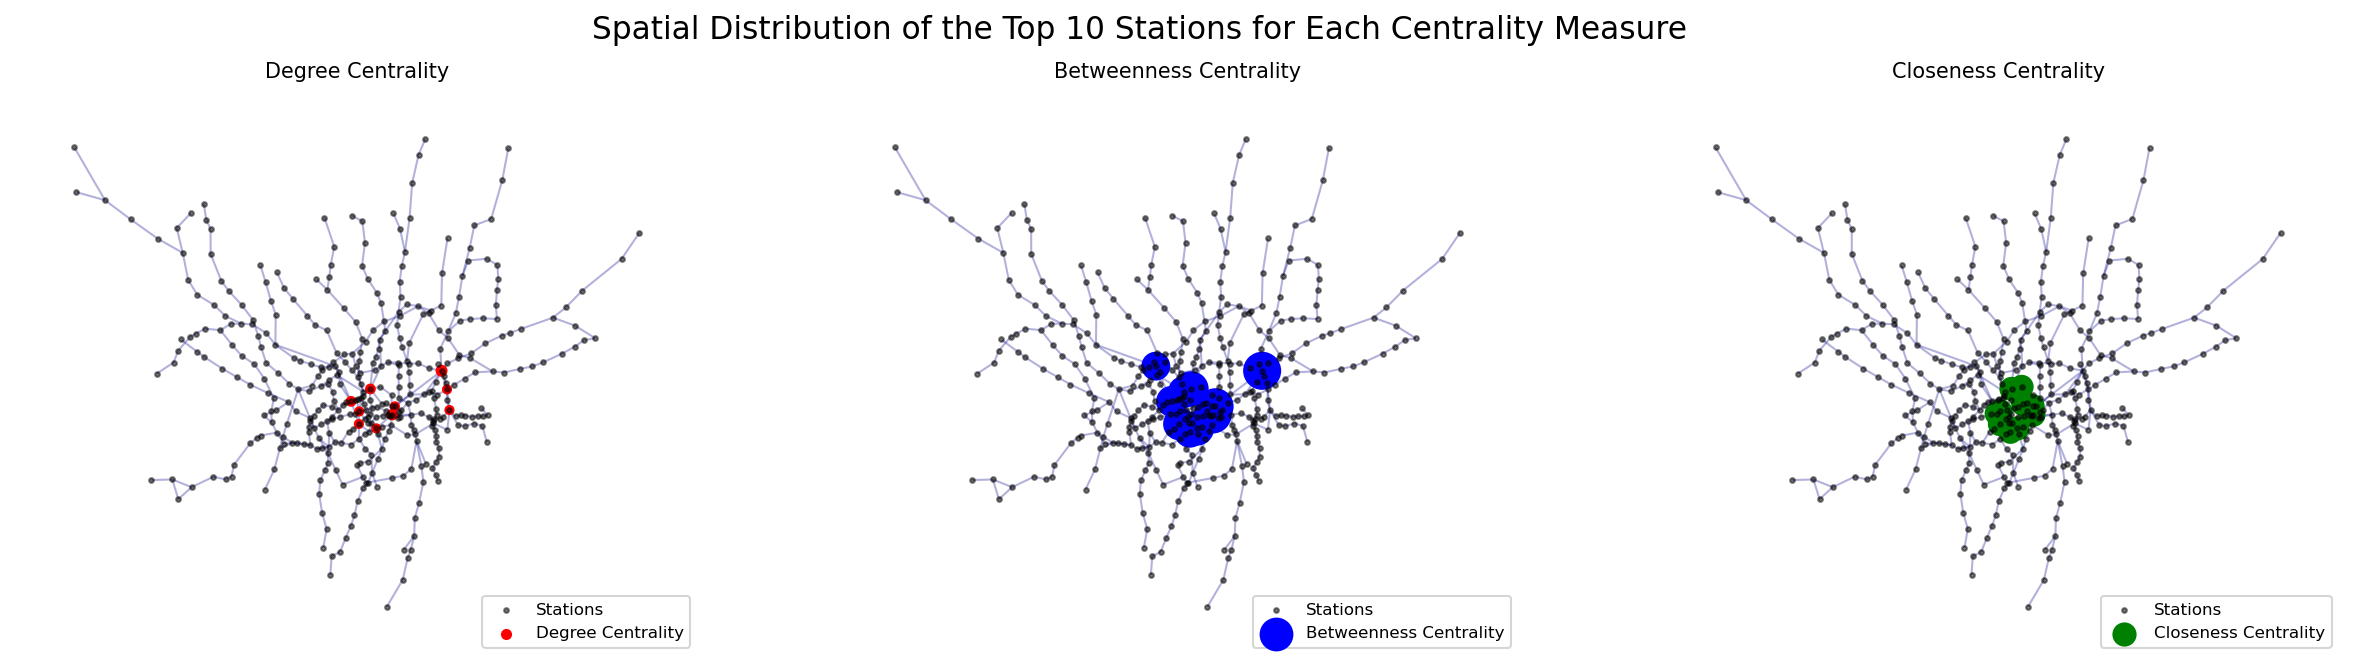

In [55]:
# Create DataFrames for each centrality measure
deg_cen_df = pd.DataFrame(sorted_degree, columns=['station', 'degree_centrality'])
bet_cen_df = pd.DataFrame(sorted_betweenness, columns=['station', 'betweenness_centrality'])
clo_cen_df = pd.DataFrame(sorted_closeness, columns=['station', 'closeness_centrality'])

# Create a single figure with multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), dpi=150)

# Loop through the top 10 stations for each centrality measure
for i, df in enumerate([deg_cen_df.head(10), bet_cen_df.head(10), clo_cen_df.head(10)]):
    ax = axes[i]

    # Plot the London tube map as a background
    nx.draw_networkx_edges(G, pos, edge_color='darkblue', alpha=0.3, ax=ax)
    nx.draw_networkx_nodes(G, pos, node_size=5, node_color='black', alpha=0.5, label='Stations', ax=ax)

    # Get the x and y coordinates of each station
    x = [pos[node][0] for node in df['station']]
    y = [pos[node][1] for node in df['station']]

    # Get the scaled node size based on the centrality value
    node_sizes = df[df.columns[1]] * 1000

    # Plot the stations as a scatter plot with different color and size for each centrality measure
    ax.scatter(x, y, color=colors[i], s=node_sizes, label=titles[i])

    # Add a title and legend to the plot
    ax.set_title(titles[i], fontsize=10)
    ax.legend(loc='lower right', fontsize=8)

    # Hide the axis
    ax.axis('off')

# Add a common title for the entire figure
plt.suptitle('Spatial Distribution of the Top 10 Stations for Each Centrality Measure', fontsize=15)

plt.savefig('Spatial Distribution of the Top 10 Stations for Each Centrality Measurey.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


#### 1.1.2 Impact measures

In [13]:
# define function to calculate normalized size of giant component
def normalized_size_giant_component(G):
    giant_component = max(nx.connected_components(G), key=len)
    return len(giant_component)/float(len(G))

In [14]:
# define global efficiency function
def Global_Efficiency(G):
    if len(G) * (len(G) - 1) > 0:
        ge = 0
        for path_all in nx.all_pairs_shortest_path_length(G):
            node = path_all[0]
            for target in path_all[1]:
                if target != node:
                    ge += 1.0 / path_all[1][target]
        return ge / (len(G) * (len(G) - 1))
    else:
        return 0

In [15]:
import copy

def remove_nodes_and_evaluate(G, centrality_measure, removal_strategy='non_sequential', num_nodes_to_remove=10):
    G_copy = copy.deepcopy(G)
    impacts = []

    for i in range(num_nodes_to_remove):
        # Recalculate centrality measure if removal strategy is sequential
        if removal_strategy == 'sequential' and i > 0:
            centrality_measure = get_centrality_measure(G_copy)

        # Remove the highest-ranked node
        node_to_remove = centrality_measure[0][0]
        G_copy.remove_node(node_to_remove)
        centrality_measure.pop(0)

        # Calculate impact measures
        impact = (normalized_size_giant_component(G_copy), Global_Efficiency(G_copy))
        impacts.append(impact)

    return impacts

def get_centrality_measure(G, measure='degree'):
    if measure == 'degree':
        centrality = nx.degree_centrality(G)
    elif measure == 'betweenness':
        centrality = nx.betweenness_centrality(G)
    elif measure == 'closeness':
        centrality = nx.closeness_centrality(G)

    return sorted(centrality.items(), key=lambda x: x[1], reverse=True)


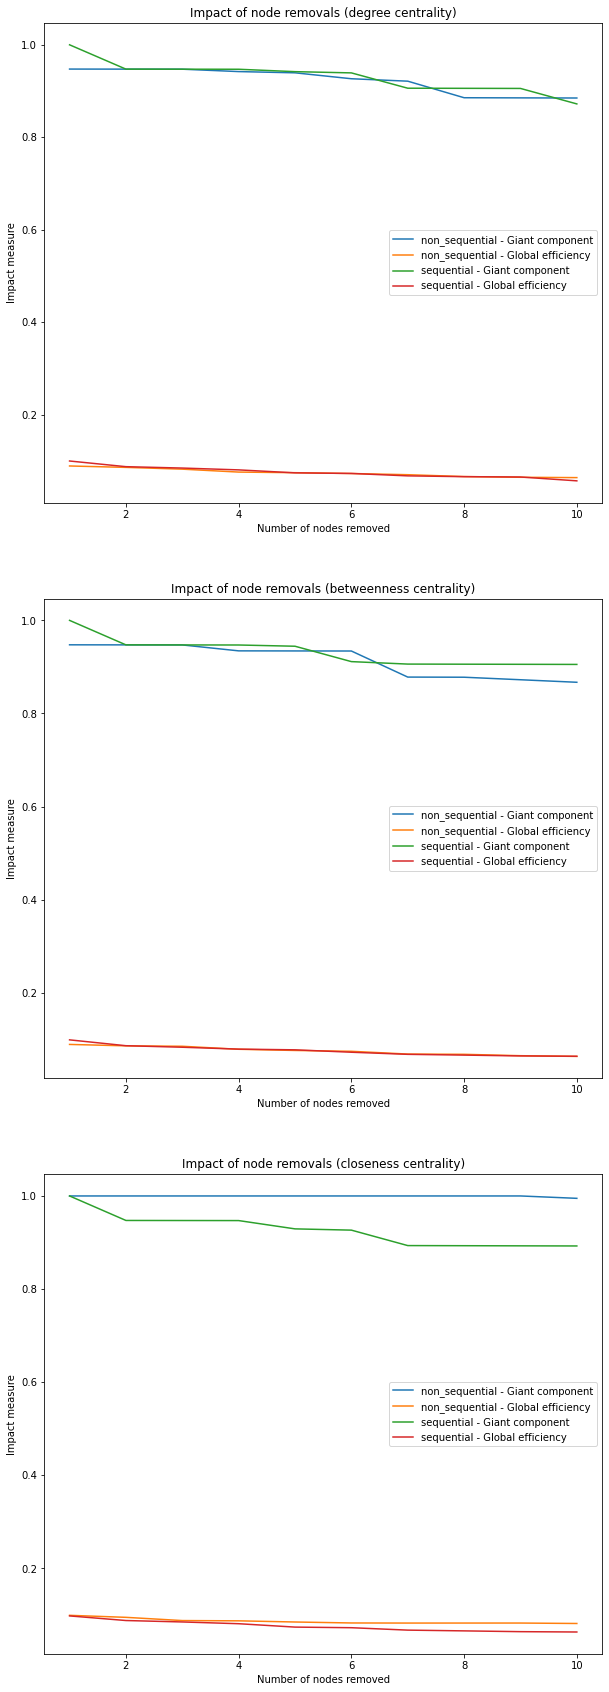

In [16]:
import matplotlib.pyplot as plt

centrality_measures = ['degree', 'betweenness', 'closeness']
removal_strategies = ['non_sequential', 'sequential']

fig, axs = plt.subplots(len(centrality_measures), figsize=(10, 30))

for i, measure in enumerate(centrality_measures):
    centrality = get_centrality_measure(G, measure=measure)
    for strategy in removal_strategies:
        impacts = remove_nodes_and_evaluate(G, centrality, removal_strategy=strategy)
        giant_component_sizes, global_efficiencies = zip(*impacts)

        axs[i].plot(range(1, len(giant_component_sizes) + 1), giant_component_sizes, label=f'{strategy} - Giant component')
        axs[i].plot(range(1, len(global_efficiencies) + 1), global_efficiencies, label=f'{strategy} - Global efficiency')

    axs[i].set_title(f'Impact of node removals ({measure} centrality)')
    axs[i].set_xlabel('Number of nodes removed')
    axs[i].set_ylabel('Impact measure')
    axs[i].legend()

plt.show()


In [17]:
initial_ge = Global_Efficiency(G)
print("Initial global efficiency:", initial_ge)

Initial global efficiency: 0.10125619359722174


In [18]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 401
Number of edges: 467


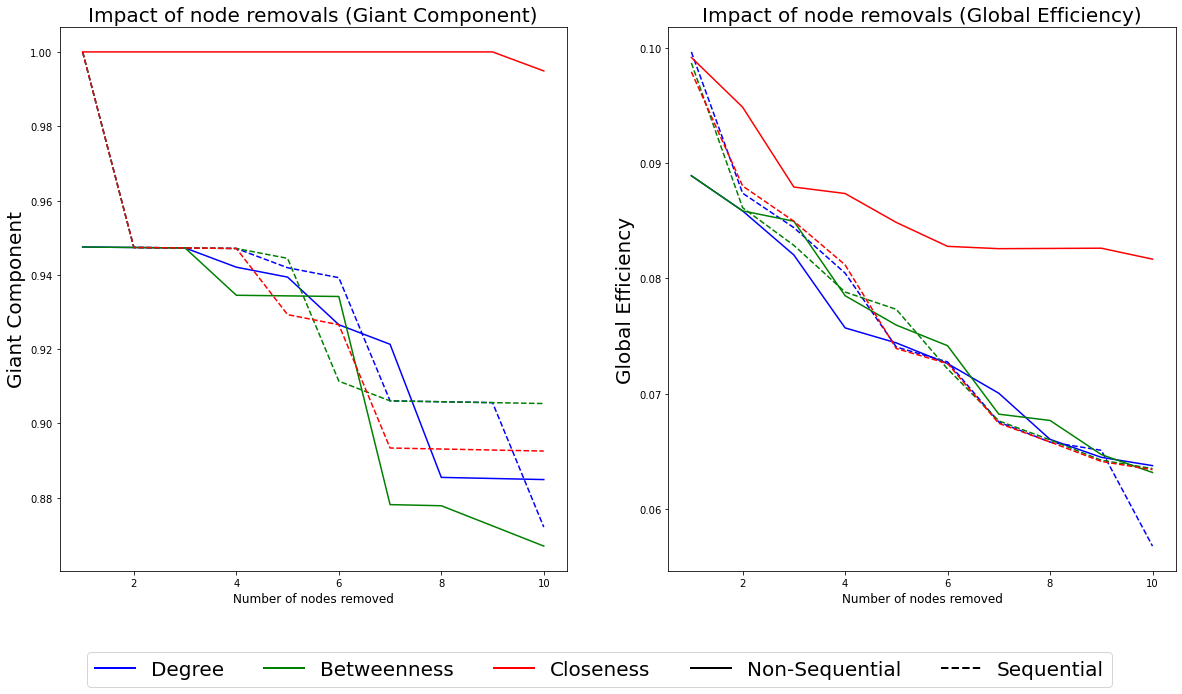

In [19]:
import matplotlib.pyplot as plt

centrality_measures = ['degree', 'betweenness', 'closeness']
removal_strategies = ['non_sequential', 'sequential']
impact_measures = ['giant_component', 'global_efficiency']

# Define a color mapping for centrality measures
color_mapping = {
    'degree': 'blue',
    'betweenness': 'green',
    'closeness': 'red',
}

fig, axs = plt.subplots(1, len(impact_measures), figsize=(20, 10))

for j, impact_measure in enumerate(impact_measures):
    for measure in centrality_measures:
        centrality = get_centrality_measure(G, measure=measure)
        color = color_mapping[measure]

        for strategy in removal_strategies:
            impacts = remove_nodes_and_evaluate(G, centrality, removal_strategy=strategy)
            giant_component_sizes, global_efficiencies = zip(*impacts)

            line_style = '-' if strategy == 'non_sequential' else '--'

            if impact_measure == 'giant_component':
                axs[j].plot(range(1, len(giant_component_sizes) + 1), giant_component_sizes, line_style, color=color, label=f'{measure} - {strategy}')
            else:
                axs[j].plot(range(1, len(global_efficiencies) + 1), global_efficiencies, line_style, color=color, label=f'{measure} - {strategy}')

    axs[j].set_title(f'Impact of node removals ({impact_measure.replace("_", " ").title()})', fontsize=20)
    axs[j].set_xlabel('Number of nodes removed', fontsize=12)
    axs[j].set_ylabel(impact_measure.replace("_", " ").title(), fontsize=20)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=color_mapping['degree'], lw=2, label='Degree'),
    Line2D([0], [0], color=color_mapping['betweenness'], lw=2, label='Betweenness'),
    Line2D([0], [0], color=color_mapping['closeness'], lw=2, label='Closeness'),
    Line2D([0], [0], color='black', lw=2, label='Non-Sequential', linestyle='-'),
    Line2D([0], [0], color='black', lw=2, label='Sequential', linestyle='--'),
]
fig.legend(handles=legend_elements, loc='lower center', ncol=len(legend_elements), bbox_to_anchor=(0.5, -0.05), fontsize=20)

# Save and show the plot
plt.savefig('impact_of_node_removal.png', dpi=300, bbox_inches='tight')
plt.show()



In [20]:
import numpy as np

def calculate_rate_of_change(values):
    rates = []
    for i in range(1, len(values)):
        rate = (values[i] - values[i - 1]) / values[i - 1]
        rates.append(rate)
    return rates

centrality_measures = ['degree', 'betweenness', 'closeness']
removal_strategies = ['non_sequential', 'sequential']
impact_measures = ['giant_component', 'global_efficiency']

average_rates = {}

for measure in centrality_measures:
    centrality = get_centrality_measure(G, measure=measure)
    average_rates[measure] = {}

    for strategy in removal_strategies:
        impacts = remove_nodes_and_evaluate(G, centrality, removal_strategy=strategy)
        giant_component_sizes, global_efficiencies = zip(*impacts)
        
        average_rates[measure][strategy] = {}
        
        for impact_measure in impact_measures:
            if impact_measure == 'giant_component':
                rate_of_change = calculate_rate_of_change(giant_component_sizes)
            else:
                rate_of_change = calculate_rate_of_change(global_efficiencies)
            
            average_rate = np.mean(rate_of_change)
            average_rates[measure][strategy][impact_measure] = average_rate

# Print the average rates of change
for measure in centrality_measures:
    for strategy in removal_strategies:
        for impact_measure in impact_measures:
            print(f"Centrality: {measure}, Strategy: {strategy}, Impact Measure: {impact_measure}, Average Rate of Change: {average_rates[measure][strategy][impact_measure]}")


Centrality: degree, Strategy: non_sequential, Impact Measure: giant_component, Average Rate of Change: -0.007492795726913122
Centrality: degree, Strategy: non_sequential, Impact Measure: global_efficiency, Average Rate of Change: -0.036116414931087505
Centrality: degree, Strategy: sequential, Impact Measure: giant_component, Average Rate of Change: -0.014892366310091961
Centrality: degree, Strategy: sequential, Impact Measure: global_efficiency, Average Rate of Change: -0.05974271817531559
Centrality: betweenness, Strategy: non_sequential, Impact Measure: giant_component, Average Rate of Change: -0.009641892016559144
Centrality: betweenness, Strategy: non_sequential, Impact Measure: global_efficiency, Average Rate of Change: -0.037013532312282355
Centrality: betweenness, Strategy: sequential, Impact Measure: giant_component, Average Rate of Change: -0.010814100856547456
Centrality: betweenness, Strategy: sequential, Impact Measure: global_efficiency, Average Rate of Change: -0.04725969

In [21]:
import pandas as pd

# Create an empty DataFrame
results_df = pd.DataFrame(columns=['Centrality', 'Strategy', 'Impact Measure', 'Average Rate of Change'])

# Fill the DataFrame with the results
for measure in centrality_measures:
    for strategy in removal_strategies:
        for impact_measure in impact_measures:
            row = {
                'Centrality': measure,
                'Strategy': strategy,
                'Impact Measure': impact_measure,
                'Average Rate of Change': average_rates[measure][strategy][impact_measure]
            }
            results_df = results_df.append(row, ignore_index=True)

# Print the table
pd.set_option('display.float_format', '{:.6f}'.format)  # Format floats to show 6 decimal places
print(results_df)


     Centrality        Strategy     Impact Measure  Average Rate of Change
0        degree  non_sequential    giant_component               -0.007493
1        degree  non_sequential  global_efficiency               -0.036116
2        degree      sequential    giant_component               -0.014892
3        degree      sequential  global_efficiency               -0.059743
4   betweenness  non_sequential    giant_component               -0.009642
5   betweenness  non_sequential  global_efficiency               -0.037014
6   betweenness      sequential    giant_component               -0.010814
7   betweenness      sequential  global_efficiency               -0.047260
8     closeness  non_sequential    giant_component               -0.000568
9     closeness  non_sequential  global_efficiency               -0.021083
10    closeness      sequential    giant_component               -0.012373
11    closeness      sequential  global_efficiency               -0.046688


/tmp/ipykernel_14133/1935176812.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(row, ignore_index=True)
/tmp/ipykernel_14133/1935176812.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(row, ignore_index=True)
/tmp/ipykernel_14133/1935176812.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(row, ignore_index=True)
/tmp/ipykernel_14133/1935176812.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(row, ignore_index=True)
/tmp/ipykernel_14133/1935176812.py:16: FutureWarning: The frame.append method is dep

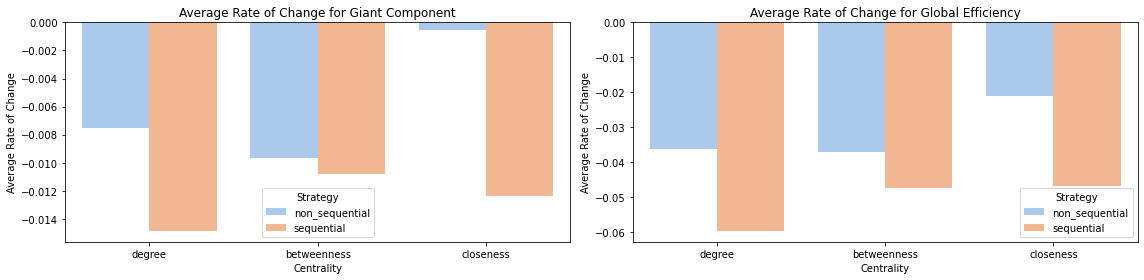

In [22]:
import seaborn as sns

# Convert the dictionary of average rates to a list of dictionaries
data = []
for measure in centrality_measures:
    for strategy in removal_strategies:
        for impact_measure in impact_measures:
            data.append({
                'Centrality': measure,
                'Strategy': strategy,
                'Impact Measure': impact_measure,
                'Average Rate of Change': average_rates[measure][strategy][impact_measure]
            })

# Create a DataFrame from the list of dictionaries
data_df = pd.DataFrame(data)

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Separate plots for each impact measure
for i, impact_measure in enumerate(impact_measures):
    impact_df = data_df[data_df['Impact Measure'] == impact_measure]
    
    # Create the bar plot
    sns.barplot(x='Centrality', y='Average Rate of Change', hue='Strategy', data=impact_df, palette='pastel', ci=None, ax=axes[i])

    # Customize the plot
    axes[i].set_title(f'Average Rate of Change for {impact_measure.replace("_", " ").title()}')
    axes[i].set_ylabel('Average Rate of Change')
    axes[i].legend(title='Strategy')

plt.tight_layout()
plt.savefig('average_rate_of_change.png', dpi=300, bbox_inches='tight')
plt.show()


## 1.2 Flows: weighted network

In [93]:
import networkx as nx
import pandas as pd

# Read the graph from the 'data' directory
G = nx.read_graphml('data/london.graph')
epsilon = 2e-1
for u, v, d in G.edges(data=True):
    d['cf'] = 1 / (d['flows'] + epsilon)
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='cf')
betweenness_ranked_weighted = sorted(betweenness_centrality_weighted.items(), key=lambda x: x[1], reverse=True)[:10]
betweenness_ranked_weighted = pd.DataFrame(betweenness_ranked_weighted, columns=['station', 'betweenness_centrality'])
betweenness_ranked_weighted['betweenness_centrality_formatted'] = betweenness_ranked_weighted['station'] + ' (' + \
                                                                  betweenness_ranked_weighted[
                                                                      'betweenness_centrality'].round(4).astype(
                                                                      str) + ')'
# Display the top 10 nodes with the highest weighted betweenness centrality
betweenness_ranked_weighted[['station', 'betweenness_centrality_formatted']]

,station,betweenness_centrality_formatted
0,Green Park,Green Park (0.5818)
1,Bank and Monument,Bank and Monument (0.5052)
2,Waterloo,Waterloo (0.4267)
3,Westminster,Westminster (0.3903)
4,Liverpool Street,Liverpool Street (0.3368)
5,Stratford,Stratford (0.3313)
6,Bond Street,Bond Street (0.293)
7,Euston,Euston (0.2842)
8,Oxford Circus,Oxford Circus (0.2796)
9,Warren Street,Warren Street (0.2506)


Weighted Efficiency Rates of Change: [0.12425347740555451, 0.1875290611927652]
Unweighted Efficiency Rates of Change: [0.043528557912326314, 0.07313485701692939]


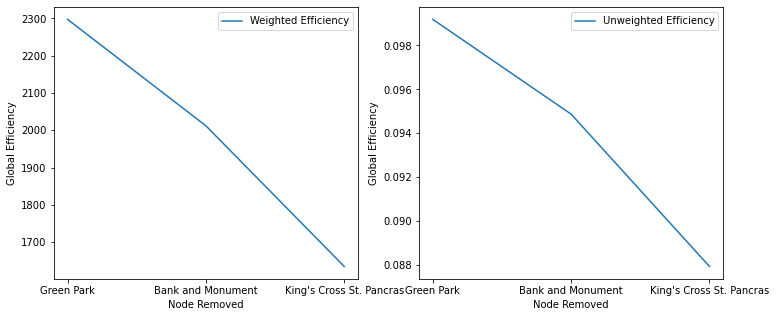

In [110]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the graph from the 'data' directory
G = nx.read_graphml('data/london.graph')
constant = 1e-100
for u, v, d in G.edges(data=True):
    d['cf'] = 1 / (d['flows'] + constant)

# Compute the adjusted betweenness centrality using inv_flows as weights
centrality = nx.betweenness_centrality(G, weight='cf')

def global_efficiency(G, weight=None):
    if weight:
        lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight=weight))
    else:
        lengths = dict(nx.all_pairs_shortest_path_length(G))
        
    n = len(G)
    efficiency = 0
    
    for node in lengths:
        for target in lengths[node]:
            if node != target and lengths[node][target] != 0:
                efficiency += 1 / lengths[node][target]
    
    return efficiency / (n * (n - 1))

def remove_and_plot(G, k=3):
    nodes_to_remove = []
    
    weighted_efficiencies = []
    unweighted_efficiencies = []

    for i in range(k):
        # Recalculate the centrality for the current graph
        centrality = nx.betweenness_centrality(G, weight='cf')

        # Identify the node with the highest centrality value
        node = max(centrality, key=centrality.get)

        nodes_to_remove.append(node)
        G.remove_node(node)
        
        weighted_efficiency = global_efficiency(G, weight='cf')
        unweighted_efficiency = global_efficiency(G)
        
        weighted_efficiencies.append(weighted_efficiency)
        unweighted_efficiencies.append(unweighted_efficiency)

    # Calculate the rate of change of the efficiencies
    weighted_rates = []
    unweighted_rates = []
    for i in range(1, len(weighted_efficiencies)):
        weighted_rate = (weighted_efficiencies[i-1] - weighted_efficiencies[i]) / weighted_efficiencies[i-1]
        unweighted_rate = (unweighted_efficiencies[i-1] - unweighted_efficiencies[i]) / unweighted_efficiencies[i-1]
        weighted_rates.append(weighted_rate)
        unweighted_rates.append(unweighted_rate)

    # Print the results
    print("Weighted Efficiency Rates of Change:", weighted_rates)
    print("Unweighted Efficiency Rates of Change:", unweighted_rates)

    # Plot the efficiencies
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(nodes_to_remove, weighted_efficiencies, label="Weighted Efficiency")
    ax1.set_xlabel("Node Removed")
    ax1.set_ylabel("Global Efficiency")
    ax1.set_xticks(nodes_to_remove)
    ax1.legend()
    
    ax2.plot(nodes_to_remove, unweighted_efficiencies, label="Unweighted Efficiency")
    ax2.set_xlabel("Node Removed")
    ax2.set_ylabel("Global Efficiency")
    ax2.set_xticks(nodes_to_remove)
    ax2.legend()
    plt.savefig('weighted_network_node_removal', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function
remove_and_plot(G, k=3)

In [104]:
weighted_rates = [0.12425231079693426, 0.1875279966719939]
unweighted_rates = [0.043528557912326314, 0.07313485701692939]

total_change_weighted = sum(weighted_rates)
average_rate_weighted = total_change_weighted / len(weighted_rates)

total_change_unweighted = sum(unweighted_rates)
average_rate_unweighted = total_change_unweighted / len(unweighted_rates)

print("Total Change Weighted:", total_change_weighted)
print("Average Rate Weighted:", average_rate_weighted)
print("Total Change Unweighted:", total_change_unweighted)
print("Average Rate Unweighted:", average_rate_unweighted)

Total Change Weighted: 0.31178030746892815
Average Rate Weighted: 0.15589015373446408
Total Change Unweighted: 0.1166634149292557
Average Rate Unweighted: 0.05833170746462785


# 2 Spatial Interaction models

## 2.1 Models and calibration

In [56]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString #this library is for manipulating geometric objects, and it is what geopandas uses to store geometries
from scipy.spatial import distance

import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [57]:
flow = pd.read_csv("data/london_flows.csv")
flow = flow.drop(flow[flow['station_destination'] == 'Battersea Park'].index)
flow = flow.drop(flow[flow['station_origin'] == 'Battersea Park'].index)
x_variables = ["jobs", "distance","population"]
log_x_vars = []
for x in x_variables:
    flow[f"log_{x}"] = np.log(flow[x]+1)
    log_x_vars.append(f"log_{x}")
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271491,9.003627,6.39693
1,Abbey Road,Beckton,1,599,442,8510.121774,6.093570,9.049129,6.39693
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.501290,8.236539,6.39693
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981438,8.534545,6.39693
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.644004,7.709722,6.39693


In [58]:
flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']] = flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']].round(0)
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0


In [59]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61431 entries, 0 to 61473
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61431 non-null  object 
 1   station_destination  61431 non-null  object 
 2   flows                61431 non-null  int64  
 3   population           61431 non-null  int64  
 4   jobs                 61431 non-null  int64  
 5   distance             61431 non-null  float64
 6   log_jobs             61431 non-null  float64
 7   log_distance         61431 non-null  float64
 8   log_population       61431 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.7+ MB


In [60]:
def CalcRSquared(observed, estimated):
    # Remove rows containing NaNs
    mask = np.isfinite(observed) & np.isfinite(estimated)
    observed = observed[mask]
    estimated = estimated[mask]

    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r ** 2

    return R2


def CalcRMSE(observed, estimated):
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

def MAE(observed, predicted):
    mae_value = np.mean(np.abs(observed - predicted))
    return mae_value



In [31]:
# UM Inverse Power Law
formula = 'flows ~ log_population + log_jobs + log_distance'

UMSim = smf.glm(formula = formula, 
                  data = flow, 
                  family = sm.families.Poisson()).fit()

In [32]:
print(UMSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    61427
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4712e+06
Date:                Sat, 06 May 2023   Deviance:                   2.7703e+06
Time:                        20:56:10   Pearson chi2:                 6.20e+06
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.2837      0.012   -630.

In [33]:
K = UMSim.params[0]
alpha = UMSim.params[1]
gamma = UMSim.params[2]
beta = -UMSim.params[3]
flow["UMsimFitted_IPL"] = np.exp(K 
                                       + alpha*flow["log_population"] 
                                       + gamma*flow["log_jobs"] 
                                       - beta*flow["log_distance"])

In [34]:
CalcRMSE(flow["flows"], flow["UMsimFitted_IPL"])

124.781

In [35]:
CalcRSquared(flow["flows"], flow["UMsimFitted_IPL"])

0.1451144606053473

In [36]:
MAE(flow["flows"], flow["UMsimFitted_IPL"])

25.35175229912995

In [37]:
# UM Negative Power Law
formula = 'flows ~ log_population + log_jobs + distance'

UMSim = smf.glm(formula = formula, 
                  data = flow, 
                  family = sm.families.Poisson()).fit()

In [38]:
print(UMSim .summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    61427
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3167e+06
Date:                Sat, 06 May 2023   Deviance:                   2.4611e+06
Time:                        20:56:23   Pearson chi2:                 4.76e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.5954      0.010   -788.

In [39]:
K = UMSim.params[0]
alpha = UMSim.params[1]
gamma = UMSim.params[2]
beta = -UMSim.params[3]
flow["UMsimFitted_NPL"] = np.exp(K 
                                       + alpha*flow["log_population"] 
                                       + gamma*flow["log_jobs"] 
                                       - beta*flow["distance"])

In [40]:
CalcRSquared(flow["flows"], flow["UMsimFitted_NPL"])

0.31584912228887024

In [41]:
CalcRMSE(flow["flows"], flow["UMsimFitted_NPL"])

109.352

In [42]:
MAE(flow["flows"], flow["UMsimFitted_NPL"])

24.19340364359718

In [74]:
flow = pd.read_csv("data/london_flows.csv")
flow = flow.drop(flow[flow['station_destination'] == 'Battersea Park'].index)
flow = flow.drop(flow[flow['station_origin'] == 'Battersea Park'].index)
x_variables = ["jobs", "distance","population"]
log_x_vars = []
for x in x_variables:
    flow[f"log_{x}"] = np.log(flow[x]+1)
    log_x_vars.append(f"log_{x}")
flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']] = flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']].round(0)
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0


In [75]:
# ACM Inverse Power Law
formula = 'flows ~ station_destination + log_population + log_distance -1'

ACMSim_IPL = smf.glm(formula = formula, 
                  data = flow, 
                  family = sm.families.Poisson()).fit()
print(ACMSim_IPL.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    61031
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3171e+06
Date:                Sat, 06 May 2023   Deviance:                   2.4621e+06
Time:                        12:18:42   Pearson chi2:                 4.83e+06
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [76]:
O_i = pd.DataFrame(flow.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flow = flow.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flow.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flow = flow.merge(D_j, on = "station_destination", how = "left" )

In [77]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(ACMSim_IPL.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_destination)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
flow = flow.merge(coefs, left_on="station_destination", right_on="coef", how = "left")
flow.drop(columns = ["coef"], inplace = True)
#check this has worked
flow.head()

/tmp/ipykernel_812/439259130.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0,599,78549,1.520147
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0,599,442,-1.613371
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0,599,665,-1.420465
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0,599,58772,1.217200
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0,599,15428,0.010740


In [78]:
alpha_i = ACMSim_IPL.params[0:397]
gamma = ACMSim_IPL.params[398]
beta = -ACMSim_IPL.params[399]
flow["ACMSIMFitted_IPL"] = np.exp(flow["alpha_i"] 
                                       + gamma*flow["log_population"] 
                                       - beta*flow["log_distance"])

In [79]:
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population,O_i,D_j,alpha_i,ACMSIMFitted_IPL
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0,599,78549,1.520147,44.326322
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0,599,442,-1.613371,1.931043
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0,599,665,-1.420465,3.010679
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0,599,58772,1.217200,32.741122
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0,599,15428,0.010740,12.595891


In [80]:
CalcRSquared(flow["flows"], flow["ACMSIMFitted_IPL"])

0.19418496866035892

In [81]:
CalcRMSE(flow["flows"], flow["ACMSIMFitted_IPL"])

120.309

In [82]:
MAE(flow["flows"], flow["ACMSIMFitted_IPL"])

24.108208704676947

In [83]:
flow = pd.read_csv("data/london_flows.csv")
flow = flow.drop(flow[flow['station_destination'] == 'Battersea Park'].index)
flow = flow.drop(flow[flow['station_origin'] == 'Battersea Park'].index)
x_variables = ["jobs", "distance","population"]
log_x_vars = []
for x in x_variables:
    flow[f"log_{x}"] = np.log(flow[x]+1)
    log_x_vars.append(f"log_{x}")
flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']] = flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']].round(0)
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0


In [84]:
# ACM Negative Power Law
formula = 'flows ~ station_destination + log_population + distance -1'

ACMSim_NPL= smf.glm(formula = formula, 
                  data = flow, 
                  family = sm.families.Poisson()).fit()
print(ACMSim_NPL.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    61031
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1509e+06
Date:                Sat, 06 May 2023   Deviance:                   2.1297e+06
Time:                        12:19:43   Pearson chi2:                 3.51e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [85]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(flow.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flow = flow.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flow.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flow = flow.merge(D_j, on = "station_destination", how = "left" )

In [86]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(ACMSim_NPL.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_destination)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
flow = flow.merge(coefs, left_on="station_destination", right_on="coef", how = "left")
flow.drop(columns = ["coef"], inplace = True)
#check this has worked
flow.head()

/tmp/ipykernel_812/1265096058.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0,599,78549,0.681981
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0,599,442,-2.392622
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0,599,665,-2.530465
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0,599,58772,0.618074
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0,599,15428,-0.598102


In [87]:
alpha_i = ACMSim_NPL.params[0:397]
gamma = ACMSim_NPL.params[398]
beta = -ACMSim_NPL.params[399]
flow["ACMSimFitted_NPL"] = np.exp(flow["alpha_i"] 
                                       + gamma*flow["log_population"] 
                                       - beta*flow["distance"])

In [88]:
CalcRSquared(flow["flows"], flow["ACMSimFitted_NPL"])

0.36878445341066074

In [89]:
CalcRMSE(flow["flows"], flow["ACMSimFitted_NPL"])

104.699

In [90]:
MAE(flow["flows"], flow["ACMSimFitted_NPL"])

22.85688038527006

In [64]:
flow = pd.read_csv("data/london_flows.csv")
flow = flow.drop(flow[flow['station_destination'] == 'Battersea Park'].index)
flow = flow.drop(flow[flow['station_origin'] == 'Battersea Park'].index)
x_variables = ["jobs", "distance","population"]
log_x_vars = []
for x in x_variables:
    flow[f"log_{x}"] = np.log(flow[x]+1)
    log_x_vars.append(f"log_{x}")
flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']] = flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']].round(0)
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0


In [65]:
# PCM Inverse Power Law
formula = 'flows ~ station_origin + log_jobs + log_distance -1'

PCMSim_IPL = smf.glm(formula = formula, 
                  data = flow, 
                  family = sm.families.Poisson()).fit()
print(PCMSim_IPL.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    61031
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2309e+06
Date:                Sat, 06 May 2023   Deviance:                   2.2897e+06
Time:                        23:03:43   Pearson chi2:                 4.09e+06
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [66]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(flow.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flow = flow.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flow.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flow = flow.merge(D_j, on = "station_destination", how = "left" )

In [67]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(PCMSim_IPL.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
flow = flow.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
flow.drop(columns = ["coef"], inplace = True)
#check this has worked
flow.head()

/tmp/ipykernel_107/3455226886.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0,599,78549,-1.604814
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0,599,442,-1.604814
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0,599,665,-1.604814
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0,599,58772,-1.604814
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0,599,15428,-1.604814


In [68]:
alpha_i = PCMSim_IPL.params[0:397]
gamma = PCMSim_IPL.params[398]
beta = -PCMSim_IPL.params[399]
flow["PCMSimFitted_IPL"] = np.exp(flow["alpha_i"] 
                                       + gamma*flow["log_jobs"] 
                                       - beta*flow["log_distance"])

In [69]:
CalcRSquared(flow["flows"], flow["PCMSimFitted_IPL"])

0.2157092900012394

In [70]:
CalcRMSE(flow["flows"], flow["PCMSimFitted_IPL"])

119.506

In [71]:
MAE(flow["flows"], flow["PCMSimFitted_IPL"])

23.384362979818896

In [72]:
flow = pd.read_csv("data/london_flows.csv")
flow = flow.drop(flow[flow['station_destination'] == 'Battersea Park'].index)
flow = flow.drop(flow[flow['station_origin'] == 'Battersea Park'].index)
x_variables = ["jobs", "distance","population"]
log_x_vars = []
for x in x_variables:
    flow[f"log_{x}"] = np.log(flow[x]+1)
    log_x_vars.append(f"log_{x}")
flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']] = flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']].round(0)
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0


In [73]:
# PCM Negative Power Law
formula = 'flows ~ station_origin  + log_jobs + distance -1'

PCMSim_NPL = smf.glm(formula = formula, 
                  data = flow, 
                  family = sm.families.Poisson()).fit()
print(PCMSim_NPL.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    61031
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.5503e+05
Date:                Sat, 06 May 2023   Deviance:                   1.7378e+06
Time:                        23:04:12   Pearson chi2:                 2.57e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [74]:
O_i = pd.DataFrame(flow.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flow = flow.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flow.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flow = flow.merge(D_j, on = "station_destination", how = "left" )

In [75]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(PCMSim_NPL.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
flow = flow.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
flow.drop(columns = ["coef"], inplace = True)
#check this has worked
flow.head()

/tmp/ipykernel_107/3822061639.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0,599,78549,-2.820677
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0,599,442,-2.820677
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0,599,665,-2.820677
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0,599,58772,-2.820677
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0,599,15428,-2.820677


In [76]:
alpha_i = PCMSim_NPL.params[0:397]
gamma =  PCMSim_NPL.params[398]
beta = - PCMSim_NPL.params[399]
flow["PCMSimFitted_NPL"] = np.exp(flow["alpha_i"] 
                                       + gamma*flow["log_jobs"] 
                                       - beta*flow["distance"])

In [77]:
CalcRSquared(flow["flows"], flow["PCMSimFitted_NPL"])

0.42710646237463706

In [78]:
CalcRMSE(flow["flows"], flow["PCMSimFitted_NPL"])

99.766

In [79]:
MAE(flow["flows"], flow["PCMSimFitted_NPL"])

20.659092254090115

In [47]:
flow = pd.read_csv("data/london_flows.csv")
flow = flow.drop(flow[flow['station_destination'] == 'Battersea Park'].index)
flow = flow.drop(flow[flow['station_origin'] == 'Battersea Park'].index)
x_variables = ["jobs", "distance","population"]
log_x_vars = []
for x in x_variables:
    flow[f"log_{x}"] = np.log(flow[x]+1)
    log_x_vars.append(f"log_{x}")
flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']] = flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']].round(0)
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0


In [48]:
#PACM Inverse Power Law
form = 'flows ~ station_origin + station_destination + log_distance -1'
#run a destination constrained sim
PACMSim_IPL = smf.glm(formula = form, data=flow, family=sm.families.Poisson()).fit()
print(PACMSim_IPL.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    60635
Model Family:                 Poisson   Df Model:                          795
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1529e+06
Date:                Sat, 06 May 2023   Deviance:                   2.1335e+06
Time:                        22:58:27   Pearson chi2:                 3.67e+06
No. Iterations:                    11   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [49]:
O_i = pd.DataFrame(flow.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flow = flow.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flow.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flow = flow.merge(D_j, on = "station_destination", how = "left" )

In [50]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(PACMSim_IPL.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
flow = flow.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
flow.drop(columns = ["coef"], inplace = True)
#check this has worked
flow.head()

/tmp/ipykernel_107/2414148666.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0,599,78549,3.132771
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0,599,442,3.132771
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0,599,665,3.132771
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0,599,58772,3.132771
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0,599,15428,3.132771


In [51]:
alpha_i = PACMSim_IPL.params[0:794]
beta = - PACMSim_IPL.params[795]
flow["PACMSimFitted_IPL"] = np.exp(flow["alpha_i"] 
                                       - beta*flow["log_distance"])

In [52]:
beta

0.2661793631956606

In [53]:
CalcRMSE(flow["flows"], flow["PACMSimFitted_IPL"])

131.154

In [54]:
CalcRSquared(flow["flows"], flow["PACMSimFitted_IPL"])

0.06866456948970216

In [55]:
MAE(flow["flows"], flow["PACMSimFitted_IPL"])

23.882224280210604

In [56]:
flow = pd.read_csv("data/london_flows.csv")
flow = flow.drop(flow[flow['station_destination'] == 'Battersea Park'].index)
flow = flow.drop(flow[flow['station_origin'] == 'Battersea Park'].index)
x_variables = ["jobs", "distance","population"]
log_x_vars = []
for x in x_variables:
    flow[f"log_{x}"] = np.log(flow[x]+1)
    log_x_vars.append(f"log_{x}")
flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']] = flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance', 'log_population']].round(0)
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,log_population
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,6.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,6.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,6.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,6.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,6.0


In [57]:
#PACM Negative Power Law
form = 'flows ~ station_origin + station_destination + distance -1'
#run a destination constrained sim
PACMSim_NPL = smf.glm(formula = form, data=flow, family=sm.families.Poisson()).fit()
print(PACMSim_NPL.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61431
Model:                            GLM   Df Residuals:                    60635
Model Family:                 Poisson   Df Model:                          795
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.6447e+05
Date:                Sat, 06 May 2023   Deviance:                   1.5567e+06
Time:                        23:00:54   Pearson chi2:                 2.05e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
O_i = pd.DataFrame(cdatasub.groupby(["OrigCodeNew"])["Total"].agg(np.sum))
O_i.rename(columns={"Total":"O_i"}, inplace = True)
cdatasub = cdatasub.merge(O_i, on = "OrigCodeNew", how = "left" )

D_j = pd.DataFrame(cdatasub.groupby(["DestCodeNew"])["Total"].agg(np.sum))
D_j.rename(columns={"Total":"D_j"}, inplace = True)
cdatasub = cdatasub.merge(D_j, on = "DestCodeNew", how = "left" )

In [ ]:
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(OrigCodeNew)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdatasub = cdatasub.merge(coefs, left_on="OrigCodeNew", right_on="coef", how = "left")
cdatasub.drop(columns = ["coef"], inplace = True)
#check this has worked
cdatasub.head()

In [60]:
alpha_i = PACMSim_NPL.params[0:794]
beta = - PACMSim_NPL.params[795]
flow["PACMSimFitted_NPL"] = np.exp(flow["alpha_i"] 
                                       - beta*flow["distance"])

In [61]:
CalcRMSE(flow["flows"], flow["PACMSimFitted_NPL"])

131.303

In [62]:
CalcRSquared(flow["flows"], flow["PACMSimFitted_NPL"])

0.0807830305198744

In [63]:
MAE(flow["flows"], flow["PACMSimFitted_NPL"])

23.33766137457204

In [340]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString #this library is for manipulating geometric objects, and it is what geopandas uses to store geometries
from scipy.spatial import distance

import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [341]:
flow = pd.read_csv("data/london_flows.csv")
flow = flow.drop(flow[flow['station_destination'] == 'Battersea Park'].index)
flow = flow.drop(flow[flow['station_origin'] == 'Battersea Park'].index)
x_variables = ["jobs", "distance"]
log_x_vars = []
for x in x_variables:
    flow[f"log_{x}"] = np.log(flow[x]+1)
    log_x_vars.append(f"log_{x}")
flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance']] = flow[['flows', 'population', 'jobs', 'distance', 'log_jobs', 'log_distance']].round(0)
flow.head()

# PCM Inverse Power Law
formula = 'flows ~ station_origin + log_jobs + log_distance -1'

PCMSim_IPL = smf.glm(formula = formula, 
                  data = flow, 
                  family = sm.families.Poisson()).fit()

In [342]:
#print(PCMSim_IPL.summary())

In [343]:
O_i = pd.DataFrame(flow.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flow = flow.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flow.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flow = flow.merge(D_j, on = "station_destination", how = "left" )

#We can do this by pulling out the parameter values
coefs = pd.DataFrame(PCMSim_IPL.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
flow = flow.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
flow.drop(columns = ["coef"], inplace = True)
#check this has worked
flow.head()

/tmp/ipykernel_3858/3026970882.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,599,78549,-1.604814
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,599,442,-1.604814
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,599,665,-1.604814
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,599,58772,-1.604814
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,599,15428,-1.604814


In [344]:
alpha_i = PCMSim_IPL.params[0:397]
gamma =  PCMSim_IPL.params[398]
beta = - PCMSim_IPL.params[399]

In [345]:
flow["PCMSimFitted_IPL"] = np.exp(flow["alpha_i"] 
                                       + gamma*flow["log_jobs"] 
                                       - beta*flow["log_distance"])

In [346]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = 0.5*row["jobs"]
    else:
        val = row["jobs"]
    return val

flow["dest_job_sa"] = flow.apply(new_sal, axis =1)

In [347]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61431 entries, 0 to 61430
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61431 non-null  object 
 1   station_destination  61431 non-null  object 
 2   flows                61431 non-null  int64  
 3   population           61431 non-null  int64  
 4   jobs                 61431 non-null  int64  
 5   distance             61431 non-null  float64
 6   log_jobs             61431 non-null  float64
 7   log_distance         61431 non-null  float64
 8   O_i                  61431 non-null  int64  
 9   D_j                  61431 non-null  int64  
 10  alpha_i              61431 non-null  float64
 11  PCMSimFitted_IPL     61431 non-null  float64
 12  dest_job_sa          61431 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 6.6+ MB


In [348]:
dj_gamma = flow["dest_job_sa"]**gamma
dist_beta = flow["distance"]**-beta
flow["Ai1"] = dj_gamma * dist_beta
A_i = pd.DataFrame(flow.groupby(["station_origin"])["Ai1"].agg(np.sum))
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
flow = flow.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [349]:
flow["PCMSimFitted_IPL1"] = flow["A_i"]*dj_gamma*dist_beta*flow["population"]
flow["PCMSimFitted_IPL1"] = round(flow["PCMSimFitted_IPL1"])
flow[["PCMSimFitted_IPL", "PCMSimFitted_IPL1"]]

,PCMSimFitted_IPL,PCMSimFitted_IPL1
0,90.312112,122.0
1,1.775409,2.0
2,5.163858,4.0
3,90.312112,64.0
4,54.556035,49.0
...,...,...
61426,106.733978,153.0
61427,310.440594,256.0
61428,29.383937,32.0
61429,64.476209,70.0


In [350]:
diff = flow.groupby('station_destination',as_index=False).agg({'PCMSimFitted_IPL':'sum','PCMSimFitted_IPL1':'sum'})
diff["diff"]= diff["PCMSimFitted_IPL"] - diff["PCMSimFitted_IPL1"]

diff["diff_abs"]= abs(diff["diff"])
diff.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff = diff.head(50)
diff

,station_destination,PCMSimFitted_IPL,PCMSimFitted_IPL1,diff,diff_abs
54,Canary Wharf,53415.985491,26084.0,27331.985491,27331.985491
251,Oxford Circus,41043.628305,27277.0,13766.628305,13766.628305
212,Liverpool Street,67086.777000,54907.0,12179.777000,12179.777000
364,Waterloo,26336.431211,16470.0,9866.431211,9866.431211
258,Piccadilly Circus,18944.744819,10810.0,8134.744819,8134.744819
317,St. Paul's,18674.958746,10584.0,8090.958746,8090.958746
116,Euston,20777.416060,12903.0,7874.416060,7874.416060
326,Stratford,73137.622732,65872.0,7265.622732,7265.622732
383,Westminster,18913.374796,11770.0,7143.374796,7143.374796
55,Canning Town,21951.109620,15087.0,6864.109620,6864.109620


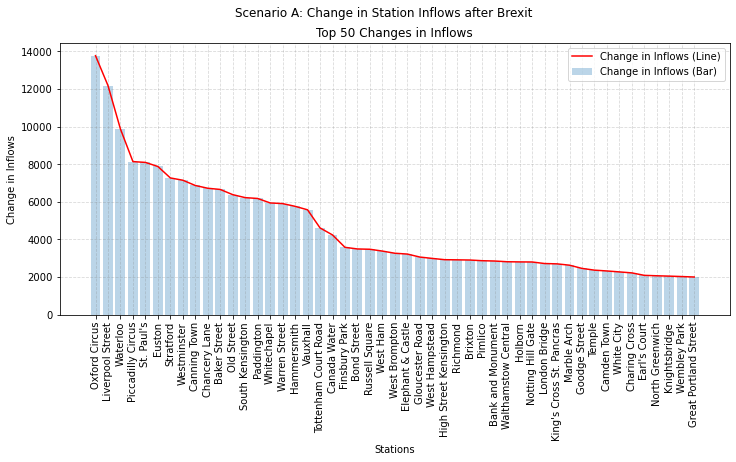

In [351]:
import matplotlib.pyplot as plt

def plot_diff_combined(df, diff_col):
    fig, ax = plt.subplots(figsize=(12, 5))
    fig.suptitle("Scenario A: Change in Station Inflows after Brexit")

    # Plot the bar chart
    ax.bar(df['station_destination'], df[diff_col], alpha=0.3, label='Change in Inflows (Bar)')

    # Plot the line chart
    ax.plot(df['station_destination'], df[diff_col], color="red", label='Change in Inflows (Line)')

    ax.grid(color='grey', linestyle='--', alpha=0.3)
    ax.set_xlabel("Stations")
    ax.set_ylabel("Change in Inflows")
    ax.set_xticks(df['station_destination'])
    ax.set_xticklabels(df['station_destination'], rotation=90)
    ax.legend(loc=1)
    ax.set_title('Top 50 Changes in Inflows')
    plt.savefig(f"scenario_a_change_in_inflows.png", dpi=300, bbox_inches='tight')
    plt.show()

# Get the top 50 changes in inflows
top_changes = diff.sort_values(by="diff_abs", ascending=False).iloc[1:51]

# Call the function to create the combined plot
plot_diff_combined(top_changes, 'diff_abs')


```
import matplotlib.pyplot as plt

def plot_diff_combined(df, diff_col_abs, diff_col):
    fig, ax = plt.subplots(figsize=(12, 5))
    fig.suptitle("Scenario A: Change in Station Inflows after Brexit")

    # Plot the bar chart for diff_abs
    ax.bar(df['station_destination'], df[diff_col_abs], alpha=0.3, label='Change in Inflows (Abs, Bar)')

    # Plot the line chart for diff_abs
    ax.plot(df['station_destination'], df[diff_col_abs], color="red", label='Change in Inflows (Abs, Line)')

    # Plot the bar chart for diff
    ax.bar(df['station_destination'], df[diff_col], alpha=0.3, label='Change in Inflows (Bar)', bottom=df[diff_col_abs])

    ax.grid(color='grey', linestyle='--', alpha=0.3)
    ax.set_xlabel("Affected Stations")
    ax.set_ylabel("Change in Inflows")
    ax.set_xticks(df['station_destination'])
    ax.set_xticklabels(df['station_destination'], rotation=90)
    ax.legend(loc=1)
    ax.set_title('Top 50 Changes in Inflows')

    # Save the figure to a file before displaying it
    plt.savefig('top_50_changes_in_inflows.png', dpi=300, bbox_inches='tight')
    
    plt.show()

# Get the top 50 changes in inflows
top_changes = diff.sort_values(by="diff_abs", ascending=False).iloc[1:51]


# Call the function to create the combined plot
plot_diff_combined(top_changes, 'diff_abs', 'diff')
```

In [352]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61431 entries, 0 to 61430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61431 non-null  object 
 1   station_destination  61431 non-null  object 
 2   flows                61431 non-null  int64  
 3   population           61431 non-null  int64  
 4   jobs                 61431 non-null  int64  
 5   distance             61431 non-null  float64
 6   log_jobs             61431 non-null  float64
 7   log_distance         61431 non-null  float64
 8   O_i                  61431 non-null  int64  
 9   D_j                  61431 non-null  int64  
 10  alpha_i              61431 non-null  float64
 11  PCMSimFitted_IPL     61431 non-null  float64
 12  dest_job_sa          61431 non-null  float64
 13  Ai1                  61431 non-null  float64
 14  A_i                  57452 non-null  float64
 15  PCMSimFitted_IPL1    57452 non-null 

In [353]:
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,PCMSimFitted_IPL,dest_job_sa,Ai1,A_i,PCMSimFitted_IPL1
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,599,78549,-1.604814,90.312112,78549.0,555.807531,0.000367,122.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,599,442,-1.604814,1.775409,442.0,9.363254,0.000367,2.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,599,665,-1.604814,5.163858,665.0,16.229923,0.000367,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,599,58772,-1.604814,90.312112,29386.0,292.941449,0.000367,64.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,599,15428,-1.604814,54.556035,15428.0,222.772474,0.000367,49.0


In [354]:
dj_gamma2 = flow["jobs"]**gamma
dist_beta1 = flow["distance"]**(-1)
flow["Ai1"] = dj_gamma2 * dist_beta1
A_i = pd.DataFrame(flow.groupby(["station_origin"])["Ai1"].agg(np.sum))
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i1"}, inplace=True)
flow = flow.merge(A_i, left_on="station_origin", right_index=True, how="left")

dist_beta2 = flow["log_distance"]**(-2)
flow["Ai2"] = dj_gamma2 * dist_beta2
A_i = pd.DataFrame(flow.groupby(["station_origin"])["Ai2"].agg(np.sum))
A_i["Ai2"] = 1/A_i["Ai2"]
A_i.rename(columns={"Ai2":"A_i2"}, inplace=True)
flow = flow.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [355]:
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,PCMSimFitted_IPL,dest_job_sa,Ai1,A_i,PCMSimFitted_IPL1,A_i1,Ai2,A_i2
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,599,78549,-1.604814,90.312112,78549.0,0.864251,0.000367,122.0,0.09105,86.766505,0.002275
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,599,442,-1.604814,1.775409,442.0,0.014092,0.000367,2.0,0.09105,1.480523,0.002275
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,599,665,-1.604814,5.163858,665.0,0.043792,0.000367,4.0,0.09105,2.583028,0.002275
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,599,58772,-1.604814,90.312112,29386.0,1.099973,0.000367,64.0,0.09105,69.081008,0.002275
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,599,15428,-1.604814,54.556035,15428.0,0.877537,0.000367,49.0,0.09105,30.562953,0.002275


In [356]:
flow["PCMSimFitted_IPL2"] = flow["A_i1"]*flow["population"]*dj_gamma2*dist_beta1
flow["PCMSimFitted_IPL2"] = round(flow["PCMSimFitted_IPL2"])

flow["PCMSimFitted_IPL3"] = flow["A_i2"]*flow["population"]*dj_gamma2*dist_beta2
flow["PCMSimFitted_IPL3"] = round(flow["PCMSimFitted_IPL3"])
#check
flow[["PCMSimFitted_IPL", "PCMSimFitted_IPL2","PCMSimFitted_IPL3"]]

,PCMSimFitted_IPL,PCMSimFitted_IPL2,PCMSimFitted_IPL3
0,90.312112,47.0,118.0
1,1.775409,1.0,2.0
2,5.163858,2.0,4.0
3,90.312112,60.0,94.0
4,54.556035,48.0,42.0
...,...,...,...
61426,106.733978,113.0,128.0
61427,310.440594,258.0,234.0
61428,29.383937,30.0,30.0
61429,64.476209,101.0,56.0


In [357]:
diffb1 = flow.groupby('station_destination',as_index=False).agg({'PCMSimFitted_IPL':'sum','PCMSimFitted_IPL2':'sum'})
diffb1["diff"]= diffb1["PCMSimFitted_IPL2"] - diffb1["PCMSimFitted_IPL"]
diffb1["diff_abs"]= abs(diffb1["diff"])
diffb1.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diffb1 = diffb1.head(50)
diffb1

,station_destination,PCMSimFitted_IPL,PCMSimFitted_IPL2,diff,diff_abs
212,Liverpool Street,67086.777000,53834.0,-13252.777000,13252.777000
326,Stratford,73137.622732,60436.0,-12701.622732,12701.622732
251,Oxford Circus,41043.628305,29098.0,-11945.628305,11945.628305
364,Waterloo,26336.431211,17318.0,-9018.431211,9018.431211
54,Canary Wharf,53415.985491,44619.0,-8796.985491,8796.985491
317,St. Paul's,18674.958746,11173.0,-7501.958746,7501.958746
258,Piccadilly Circus,18944.744819,11531.0,-7413.744819,7413.744819
55,Canning Town,21951.109620,14739.0,-7212.109620,7212.109620
383,Westminster,18913.374796,12026.0,-6887.374796,6887.374796
116,Euston,20777.416060,14210.0,-6567.416060,6567.416060


In [358]:
flow.head()

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,...,PCMSimFitted_IPL,dest_job_sa,Ai1,A_i,PCMSimFitted_IPL1,A_i1,Ai2,A_i2,PCMSimFitted_IPL2,PCMSimFitted_IPL3
0,Abbey Road,Bank and Monument,0,599,78549,8132.0,11.0,9.0,599,78549,...,90.312112,78549.0,0.864251,0.000367,122.0,0.09105,86.766505,0.002275,47.0,118.0
1,Abbey Road,Beckton,1,599,442,8510.0,6.0,9.0,599,442,...,1.775409,442.0,0.014092,0.000367,2.0,0.09105,1.480523,0.002275,1.0,2.0
2,Abbey Road,Blackwall,3,599,665,3775.0,7.0,8.0,599,665,...,5.163858,665.0,0.043792,0.000367,4.0,0.09105,2.583028,0.002275,2.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5087.0,11.0,9.0,599,58772,...,90.312112,29386.0,1.099973,0.000367,64.0,0.09105,69.081008,0.002275,60.0,94.0
4,Abbey Road,Canning Town,37,599,15428,2229.0,10.0,8.0,599,15428,...,54.556035,15428.0,0.877537,0.000367,49.0,0.09105,30.562953,0.002275,48.0,42.0


In [359]:
diffb2 = flow.groupby('station_destination',as_index=False).agg({'PCMSimFitted_IPL':'sum','PCMSimFitted_IPL3':'sum'})
diffb2["diff"]= diffb2["PCMSimFitted_IPL3"] - diffb2["PCMSimFitted_IPL"]
diffb2["diff_abs"]= abs(diffb2["diff"])
diffb2.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diffb2 = diffb1.head(50)
diffb2

,station_destination,PCMSimFitted_IPL,PCMSimFitted_IPL2,diff,diff_abs
212,Liverpool Street,67086.777000,53834.0,-13252.777000,13252.777000
326,Stratford,73137.622732,60436.0,-12701.622732,12701.622732
251,Oxford Circus,41043.628305,29098.0,-11945.628305,11945.628305
364,Waterloo,26336.431211,17318.0,-9018.431211,9018.431211
54,Canary Wharf,53415.985491,44619.0,-8796.985491,8796.985491
317,St. Paul's,18674.958746,11173.0,-7501.958746,7501.958746
258,Piccadilly Circus,18944.744819,11531.0,-7413.744819,7413.744819
55,Canning Town,21951.109620,14739.0,-7212.109620,7212.109620
383,Westminster,18913.374796,12026.0,-6887.374796,6887.374796
116,Euston,20777.416060,14210.0,-6567.416060,6567.416060


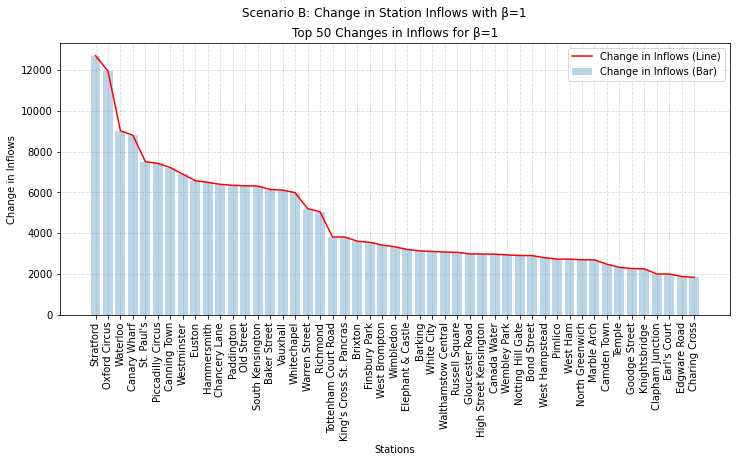

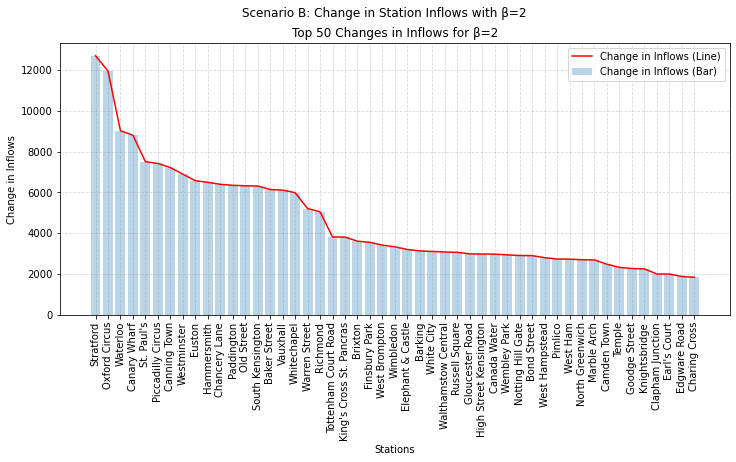

In [360]:
import matplotlib.pyplot as plt

def plot_diff_combined(df, diff_col, beta):
    fig, ax = plt.subplots(figsize=(12, 5))
    fig.suptitle(f"Scenario B: Change in Station Inflows with β={beta}")

    # Plot the bar chart
    ax.bar(df['station_destination'], df[diff_col], alpha=0.3, label='Change in Inflows (Bar)')

    # Plot the line chart
    ax.plot(df['station_destination'], df[diff_col], color="red", label='Change in Inflows (Line)')

    ax.grid(color='grey', linestyle='--', alpha=0.3)
    ax.set_xlabel("Stations")
    ax.set_ylabel("Change in Inflows")
    ax.set_xticks(df['station_destination'])
    ax.set_xticklabels(df['station_destination'], rotation=90)
    ax.legend(loc=1)
    ax.set_title(f'Top 50 Changes in Inflows for β={beta}')

    # Save the figure as an image file
    plt.savefig(f"scenario_b_change_in_inflows_beta.png", dpi=300, bbox_inches='tight')

    plt.show()

# Get the top 50 changes in inflows for both β values
top_changes_beta1 = diffb1.sort_values(by="diff_abs", ascending=False).iloc[1:51]
top_changes_beta2 = diffb2.sort_values(by="diff_abs", ascending=False).iloc[1:51]

# Call the function to create and save the combined plot for each β value
plot_diff_combined(top_changes_beta1, 'diff_abs', 1)
plot_diff_combined(top_changes_beta2, 'diff_abs', 2)



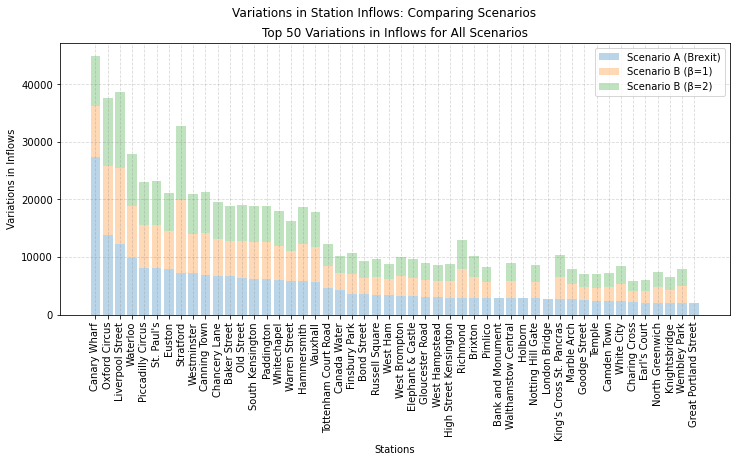

In [361]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new DataFrame to store the variations
variations = pd.DataFrame()

# Add the station_destination column
variations['station_destination'] = diff['station_destination']

# Calculate the variations for each scenario
variations['variation_a'] = diff['diff_abs']
variations['variation_b1'] = diffb1['diff_abs']
variations['variation_b2'] = diffb2['diff_abs']

# Define the function to plot the variations
def plot_variations(df):
    fig, ax = plt.subplots(figsize=(12, 5))
    fig.suptitle("Variations in Station Inflows: Comparing Scenarios")

    # Plot the stacked bar charts
    ax.bar(df['station_destination'], df['variation_a'], alpha=0.3, label='Scenario A (Brexit)')
    ax.bar(df['station_destination'], df['variation_b1'], alpha=0.3, label='Scenario B (β=1)', bottom=df['variation_a'])
    ax.bar(df['station_destination'], df['variation_b2'], alpha=0.3, label='Scenario B (β=2)', bottom=df['variation_a'] + df['variation_b1'])

    ax.grid(color='grey', linestyle='--', alpha=0.3)
    ax.set_xlabel("Stations")
    ax.set_ylabel("Variations in Inflows")
    ax.set_xticks(df['station_destination'])
    ax.set_xticklabels(df['station_destination'], rotation=90)
    ax.legend(loc=1)
    ax.set_title('Top 50 Variations in Inflows for All Scenarios')

    plt.savefig("variations_in_inflows.png", dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to plot the variations
plot_variations(variations)


# The code we don't want